In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# random seed

np.random.seed(42)

## Sample from an univariate normal distribution

In Numpy and Pytorch there are in-built functions `np.random.rand()` and `torch.randn()` to sample points from a standard normal distribution $z\sim\mathcal{N}(0, 1)$. 

If you still remember your Probability 101, you should know that sampling from a normal random variable $x\sim\mathcal{N}(\mu, \sigma^{2})$ starting from $z\sim\mathcal{N}(0, 1)$ is pretty straightforward.

You simply multiply the points sampled from $z$ by the desired standard deviation $\sigma$ (which is the square root of the variance $\sigma^2$) and add the desired mean value $\mu$, following the relation
\begin{equation*}
x = \sigma z + \mu.
\end{equation*}


In [3]:
# Univariate

mu = 10 # mean value
variance = 4
stddev = np.sqrt(variance)

n_points = 1000

z = np.random.randn(n_points)
x = mu + stddev*z

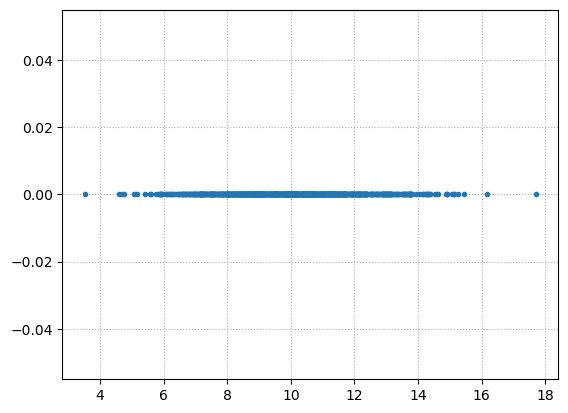

In [4]:
plt.figure()
plt.plot(x, np.zeros_like(z), '.')
plt.grid(linestyle=':')
plt.show()

## Sample from a multivariate normal distribution

The process is similar for multivariate distribution. You can start by sampling $m$ points independently from a standard normal distribution. This is the same as sampling from a standard normal vector with $m$ independent components having mean $0$ and covariance matrix $I$, $z\sim \mathcal{N}(0,I)$. 

Now suppose that we want to obtain a multivariate normal random vector with mean $\mu$ and covariance matrix $\Sigma$, i.e., $X\sim \mathcal{N}(\mu,\Sigma)$.

In order to do that, we apply a linear transformation to the vector $\mathbf{z}$, similarly to the univariate case,

\begin{equation*}
x = Lz + \mu.
\end{equation*}

with $L$ such that $LL^{\top}=\Sigma$. This can be obtained using the Cholesky decomposition, which is implemented in Numpy as `np.linalg.cholesky()`. 

In [8]:
# Multivariate with non-independent components

mu = [6, -10]
sigma = [[4, -3], [-3, 9]]

mu = np.asarray(mu)
sigma = np.asarray(sigma)
l_matrix = np.linalg.cholesky(sigma)

n_points = 1000

z = np.random.randn(2, n_points)
x = l_matrix @ z + mu[:, None]
x = x.T  # typically you want the shape to be (n_samples, n_components)

In [9]:
l_matrix  # always lower-triangular

array([[ 2.        ,  0.        ],
       [-1.5       ,  2.59807621]])

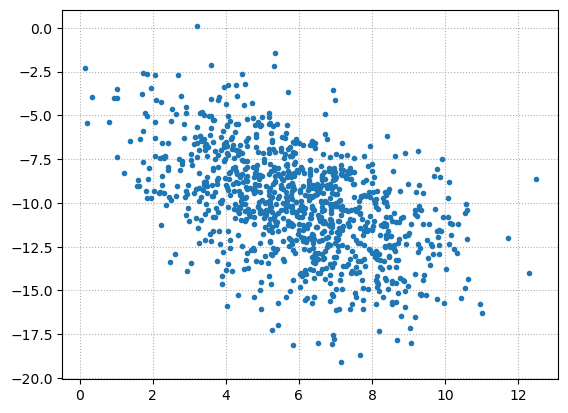

In [10]:
plt.figure()
plt.plot(x[:, 0], x[:, 1], '.')
plt.grid(linestyle=':')
plt.show()